In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import matplotlib.pyplot as plt

In [7]:
#Packages created by our group:
import route_dynamics.route_elevation.base_df as base
import route_dynamics.route_energy.longi_dynam_model as ldm
from route_dynamics.route_riders import route_riders as ride
from route_dynamics.route_visualizer import visualizer as vis

In [3]:
#User defines what routes they want to evaluate:
rt_list = [22, 101, 180]

In [4]:
#User defines idea acceleration profile:
a_prof = '../data/acceleration.csv'

/Users/ericaeggleton/opt/miniconda3/envs/route_dynamics/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/ericaeggleton/opt/miniconda3/envs/route_dynamics/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/ericaeggleton/opt/miniconda3/envs/route_dynamics/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

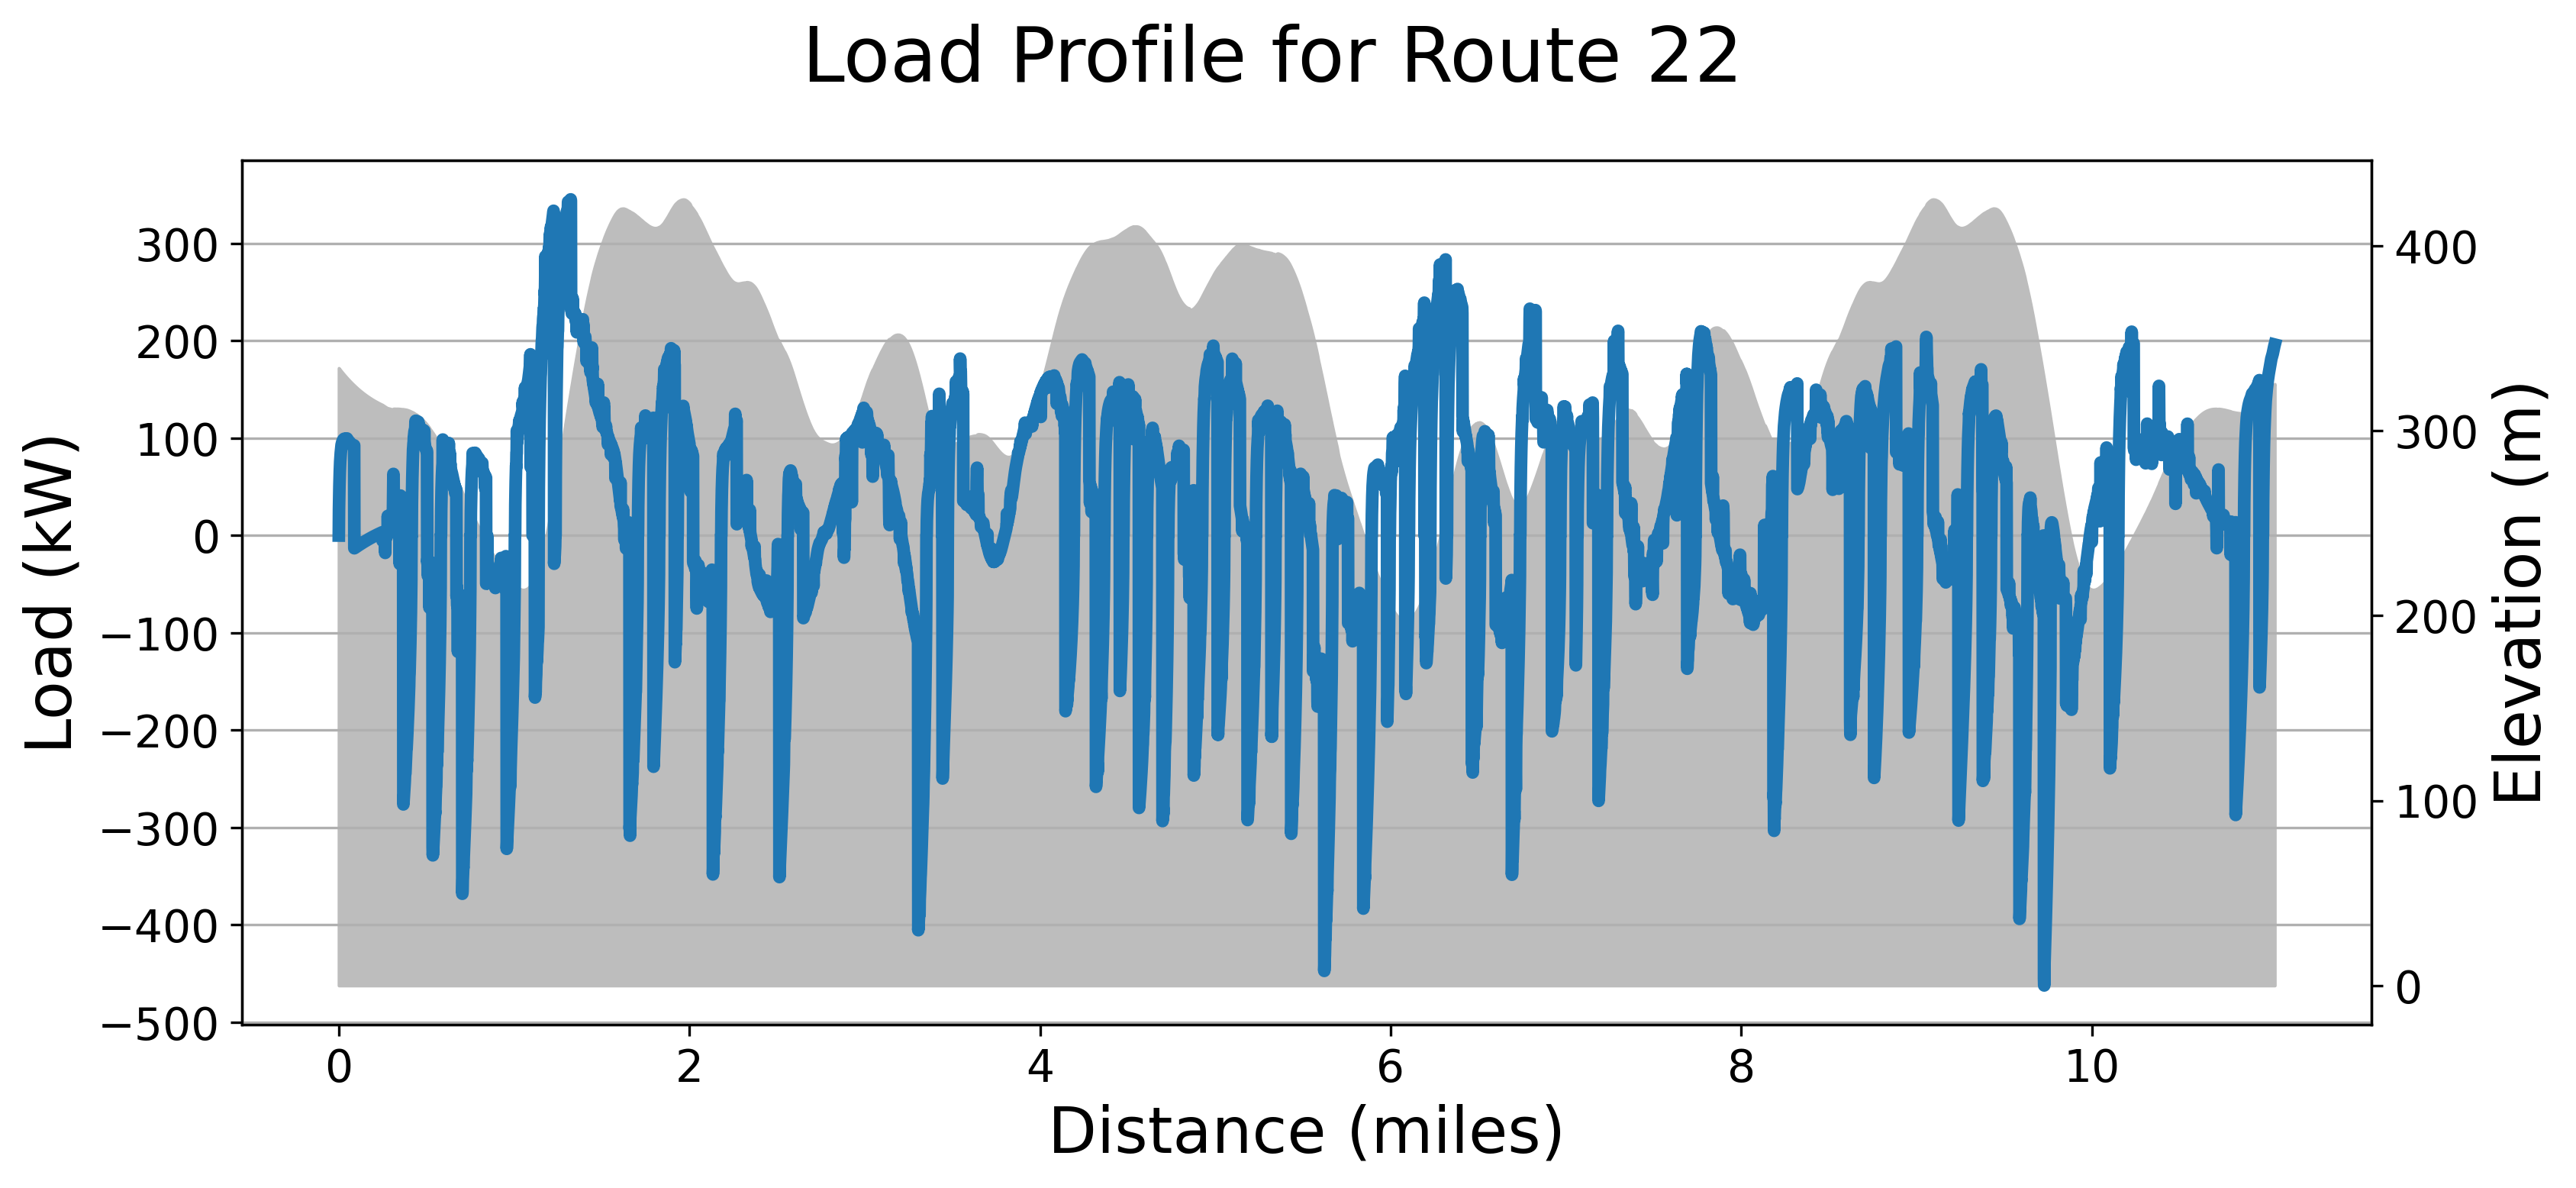

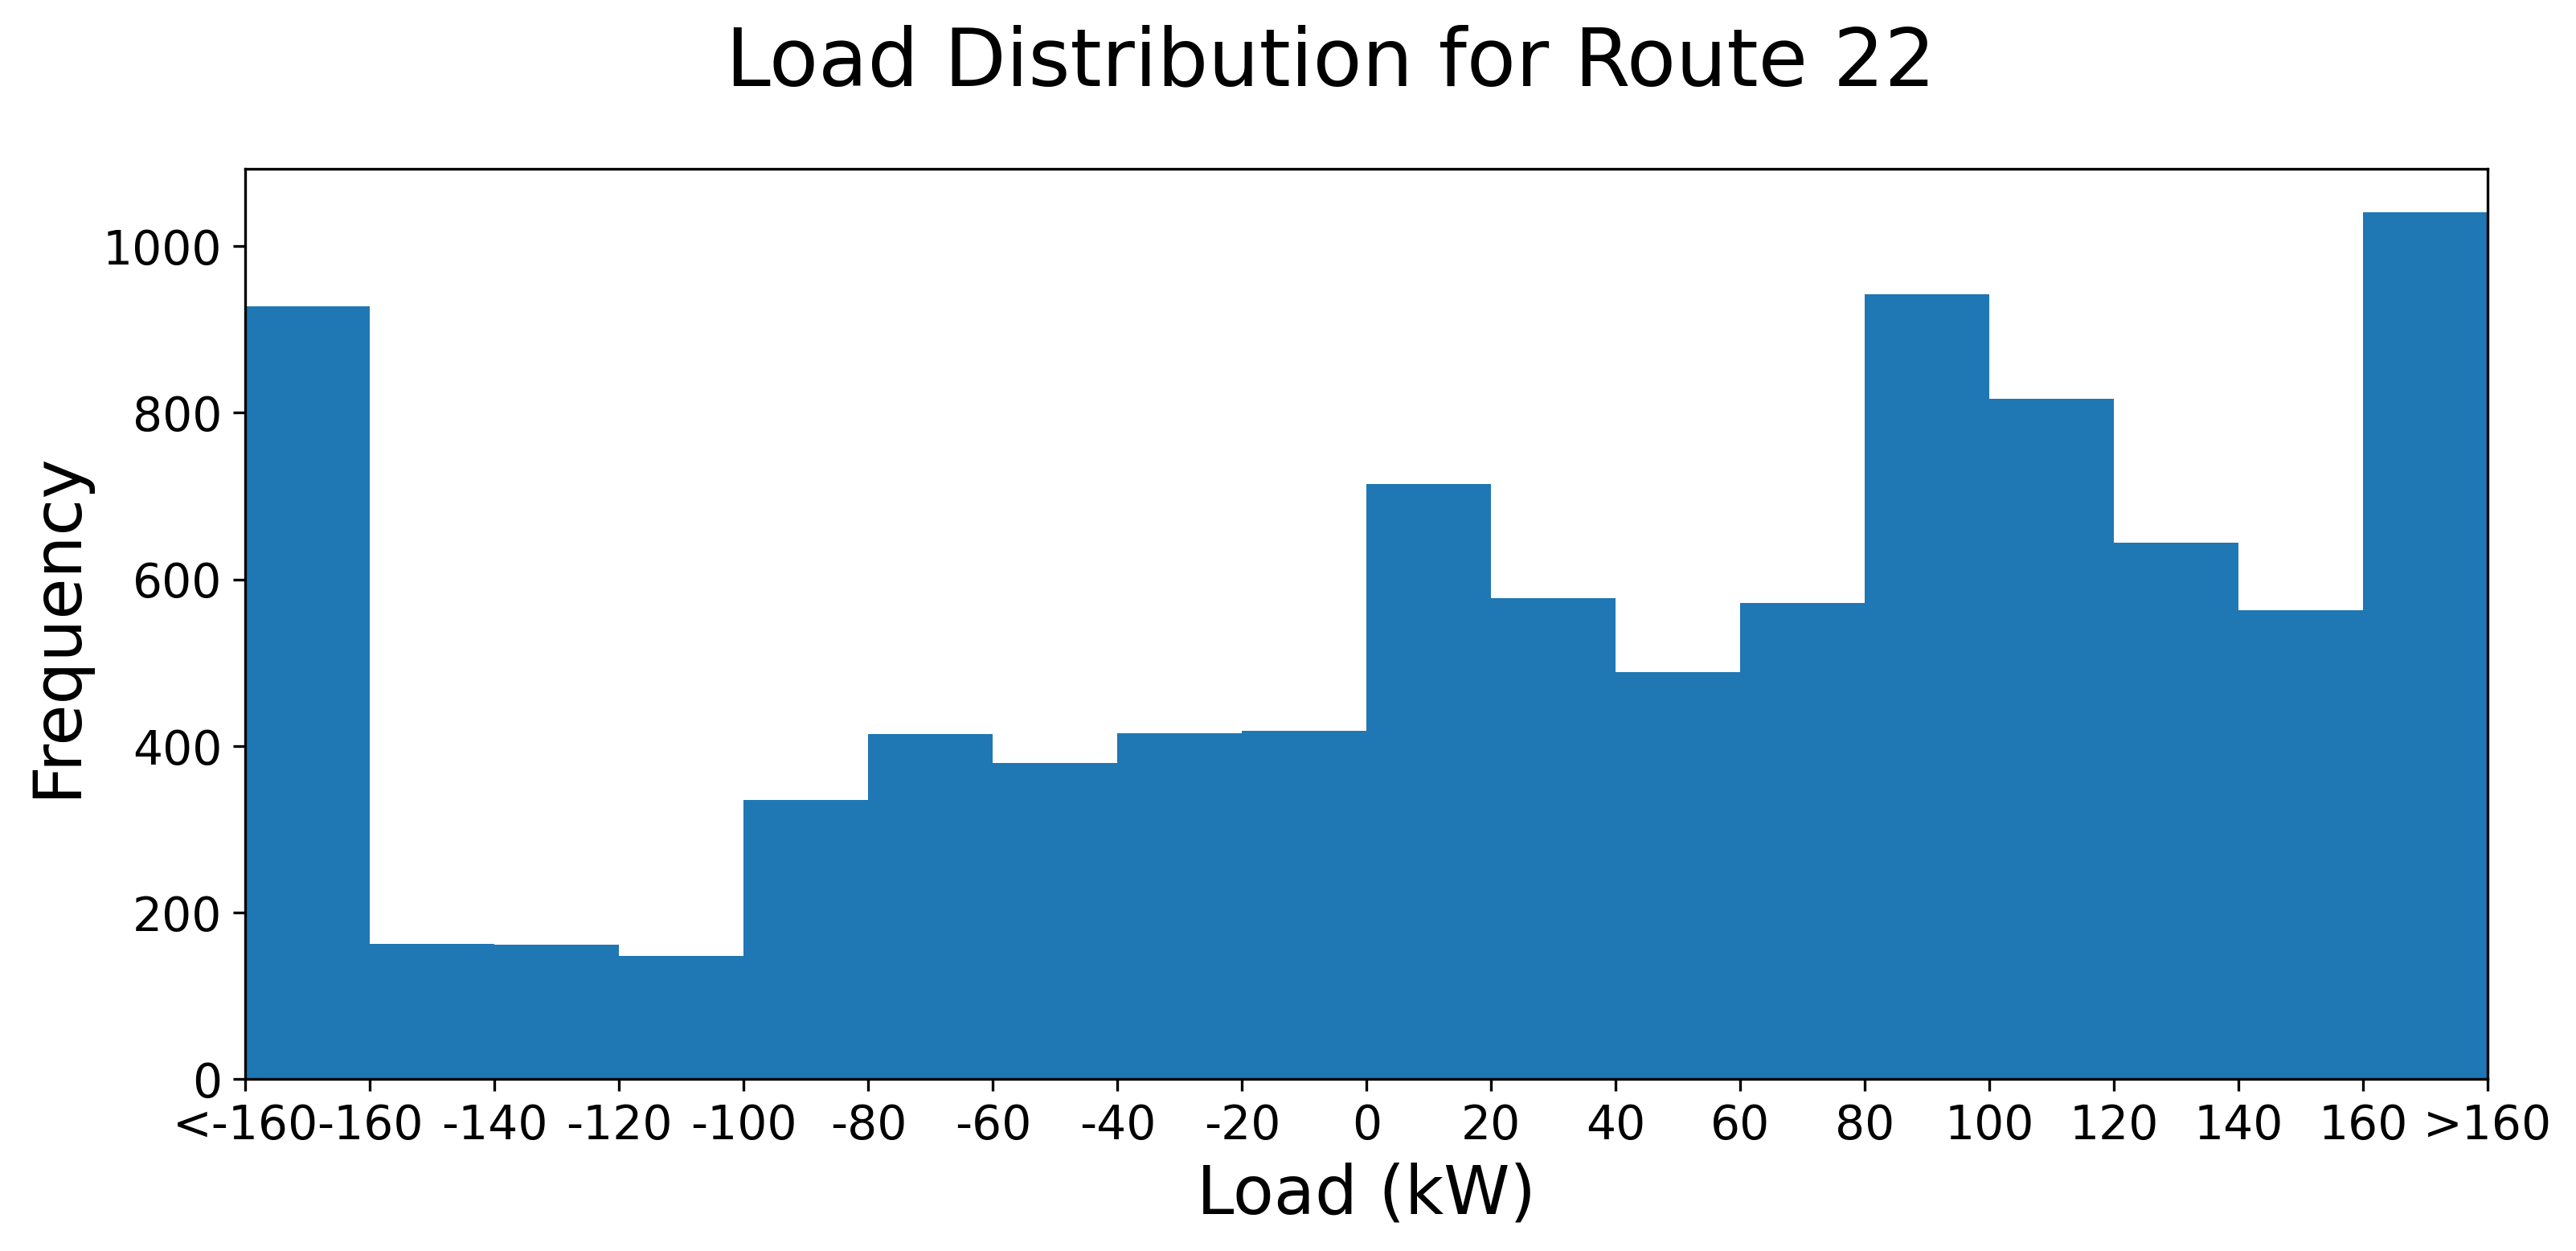

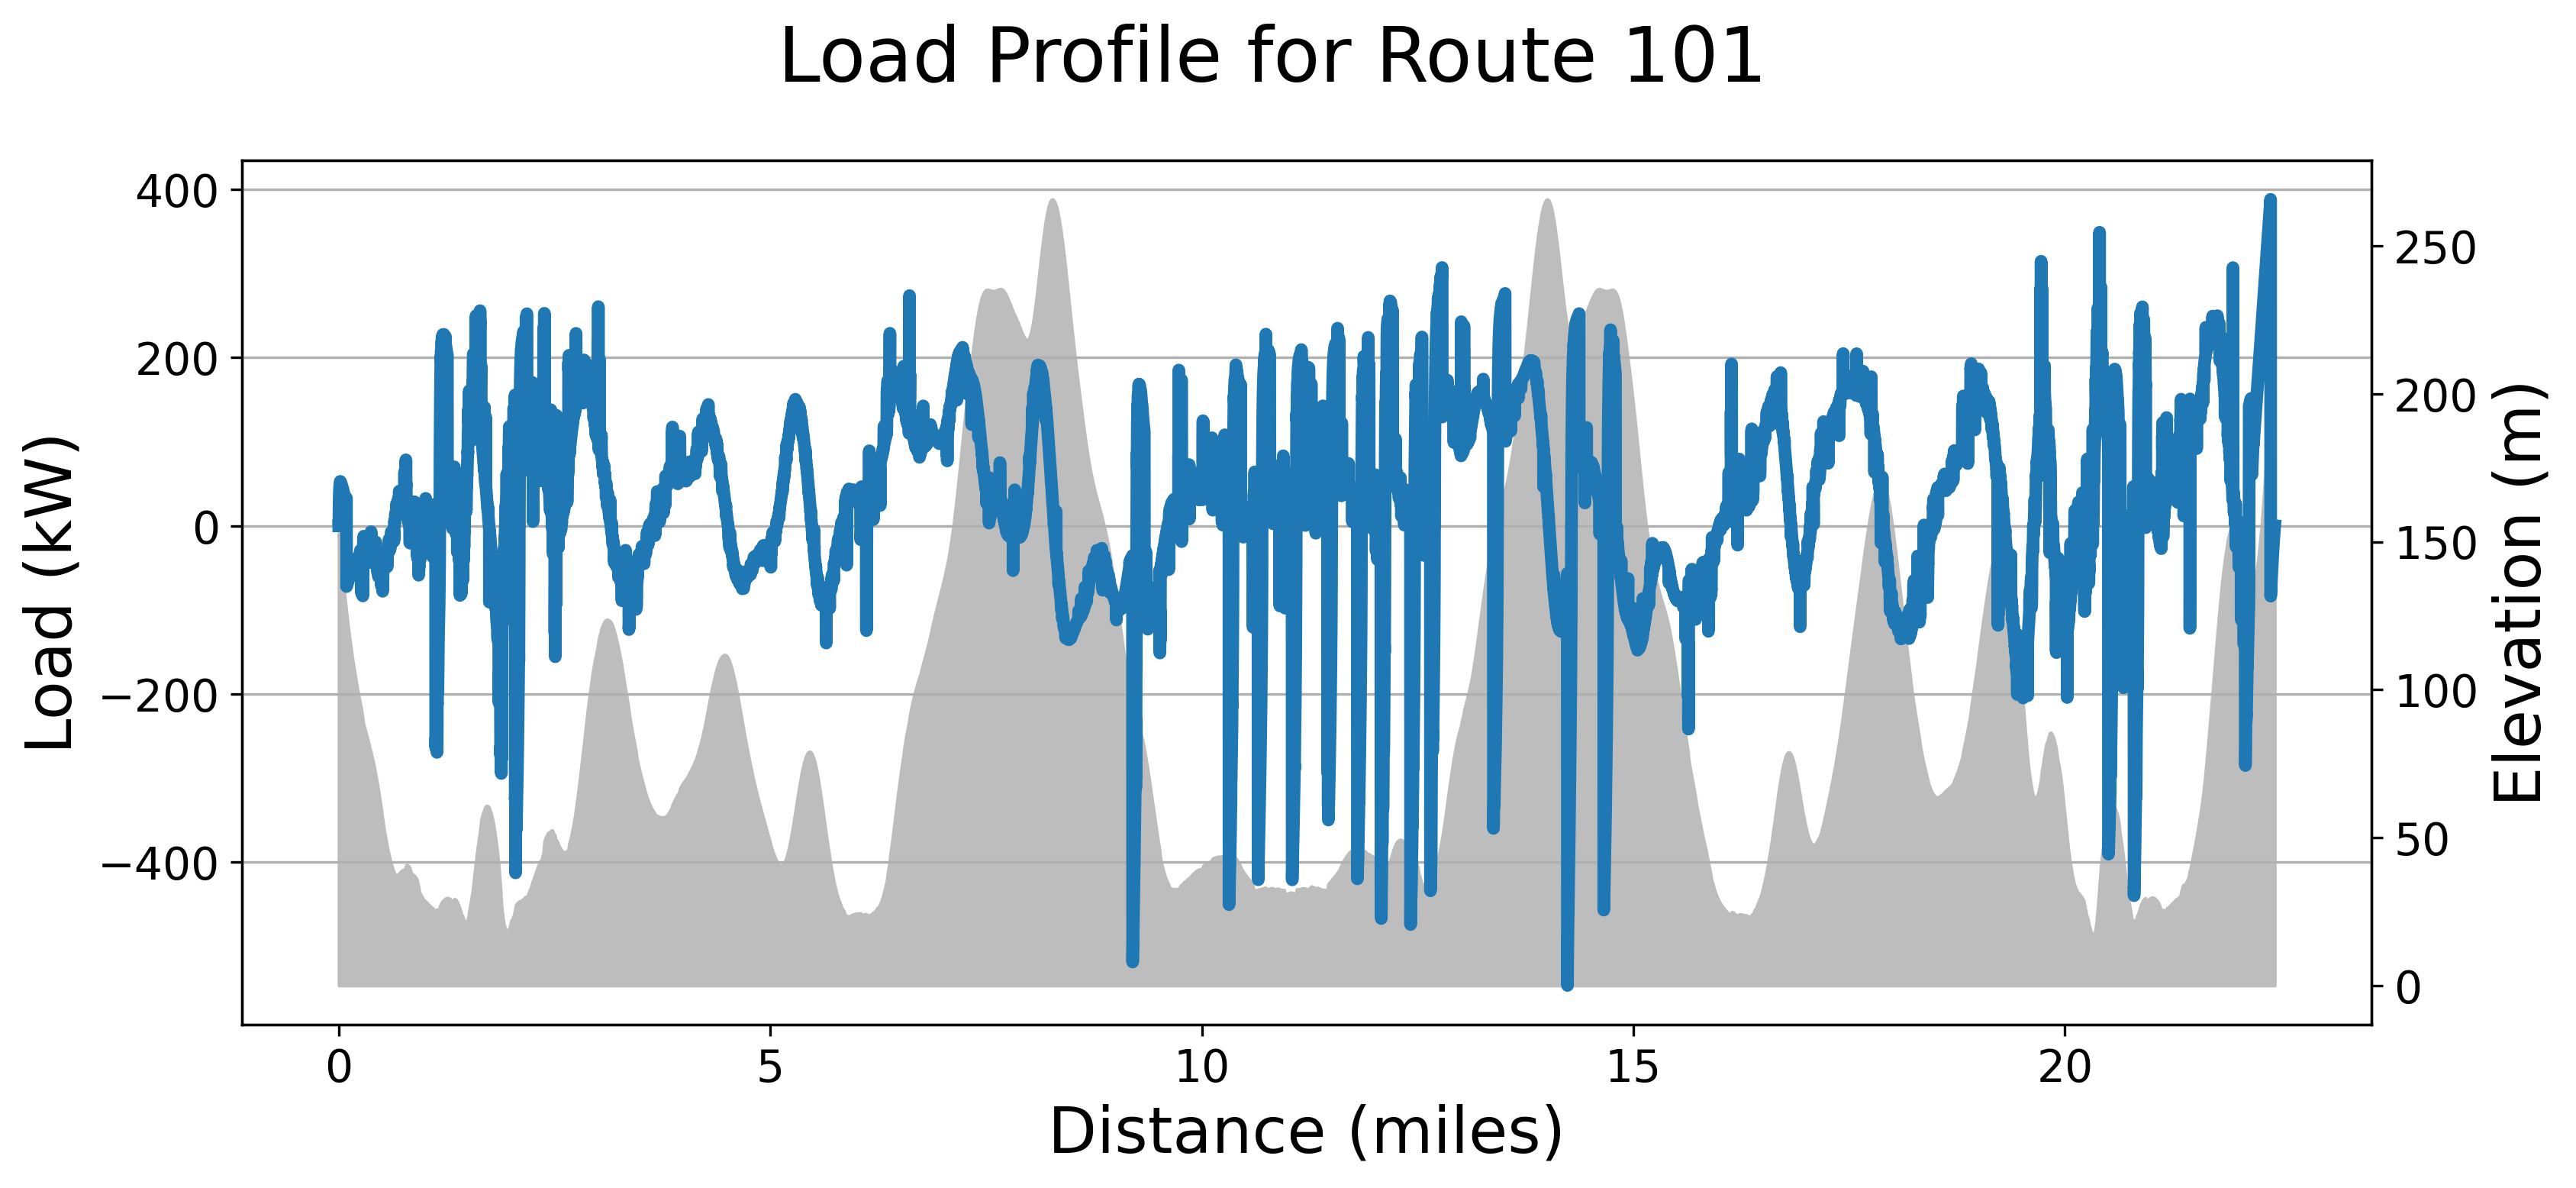

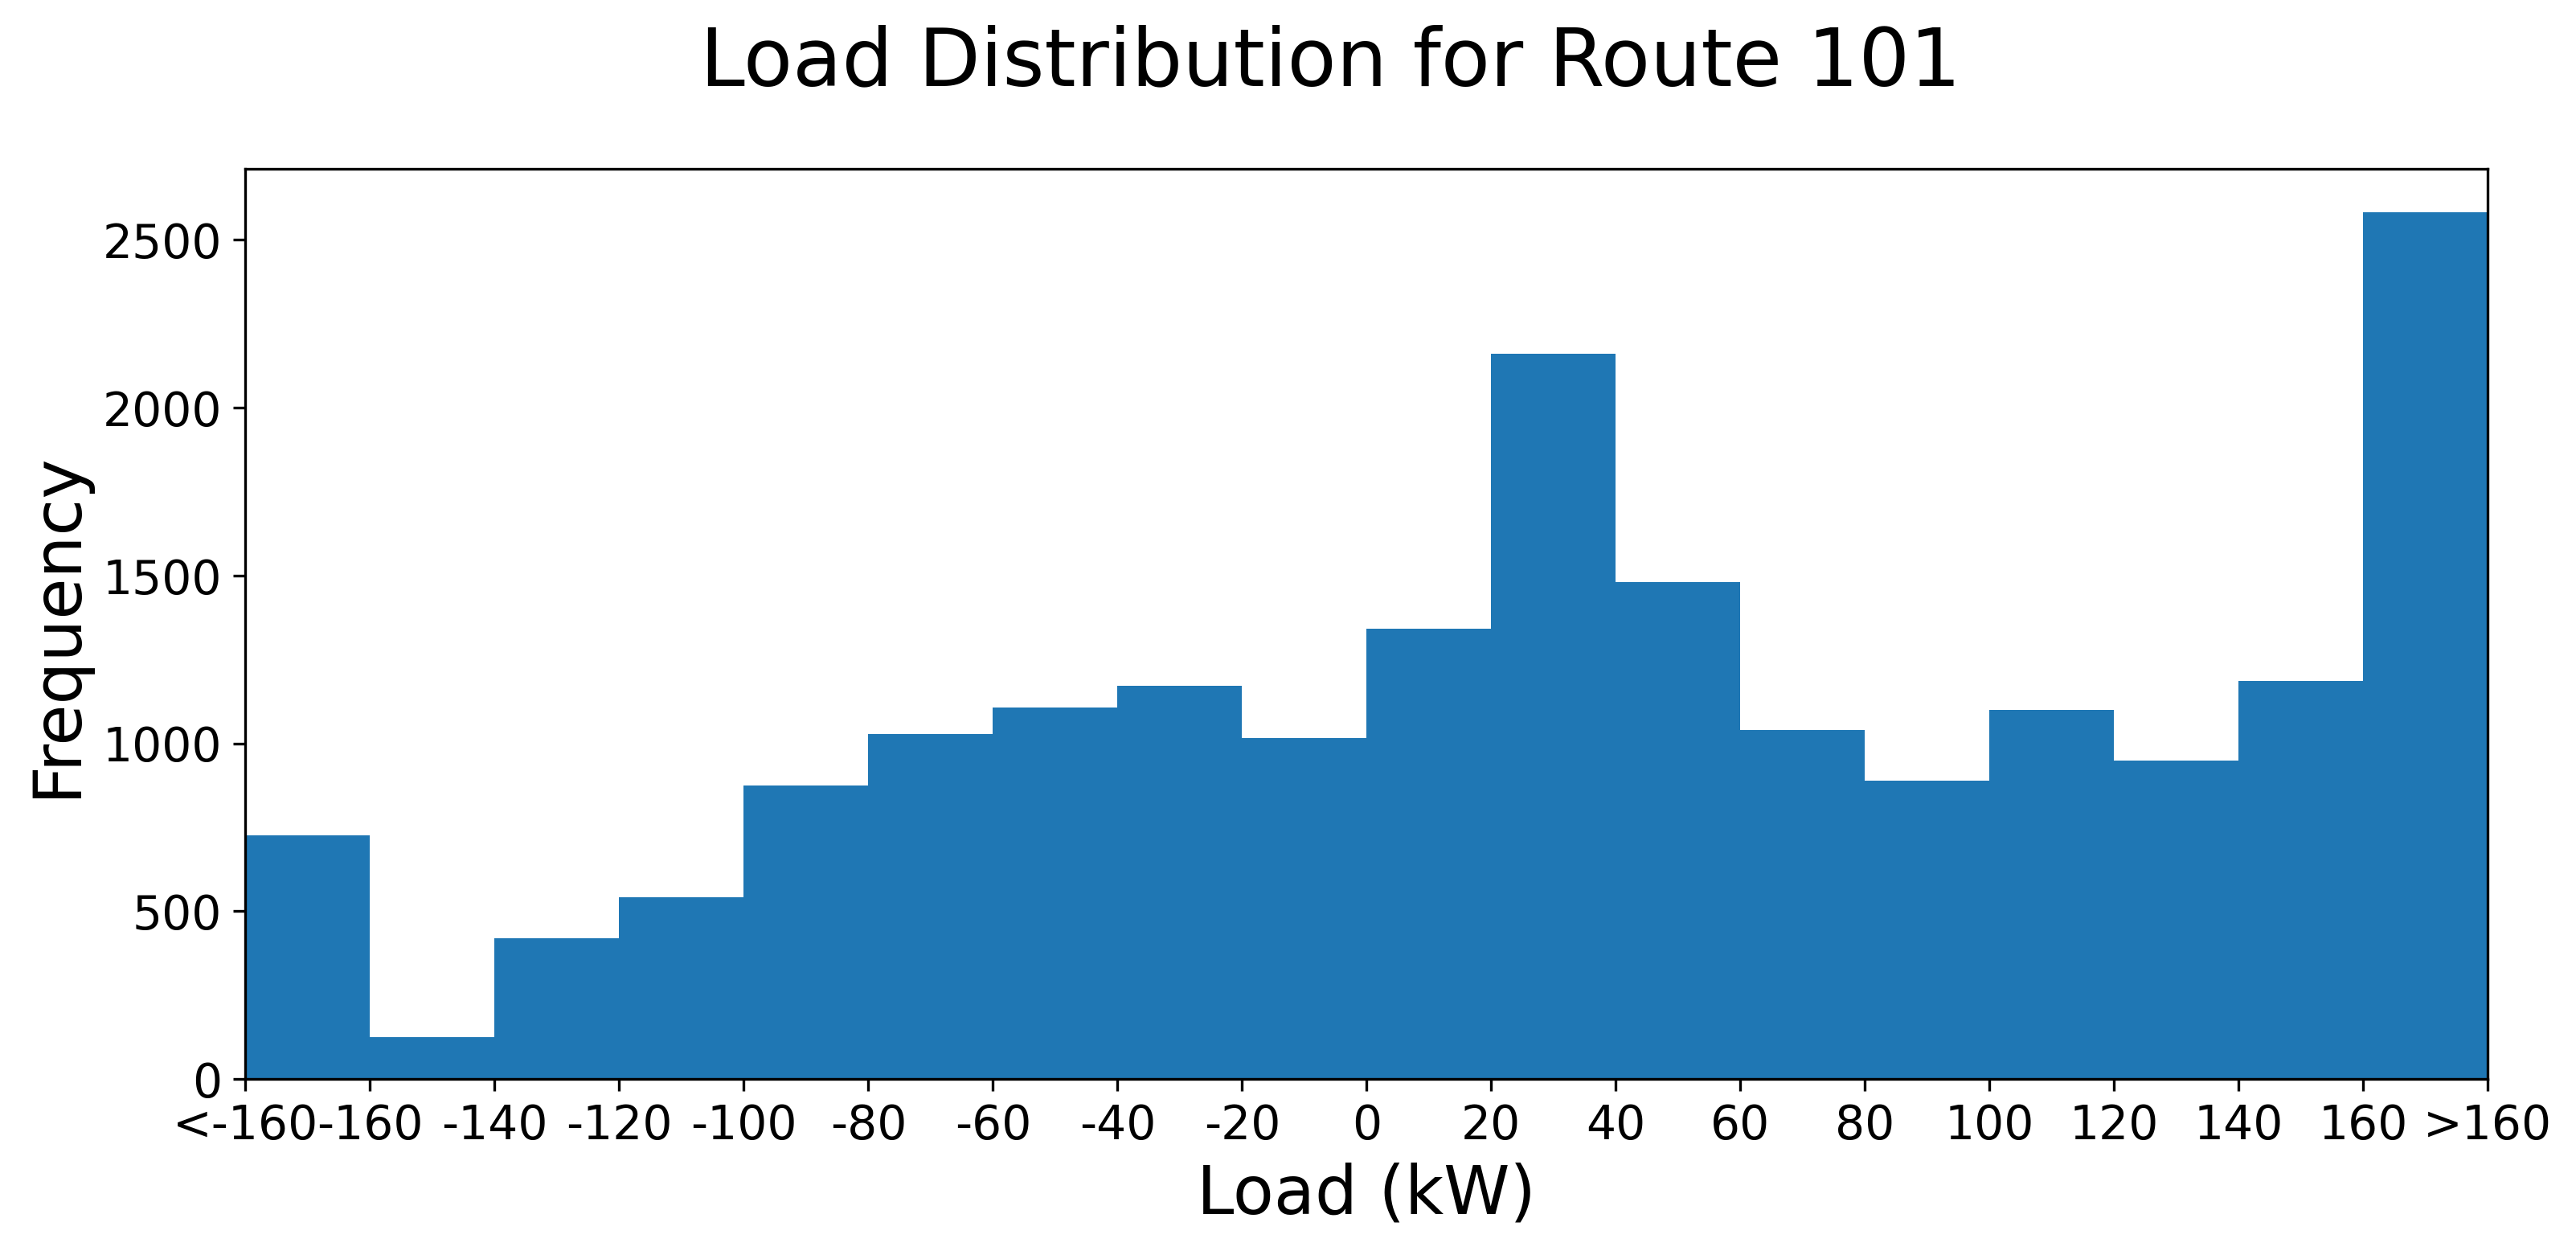

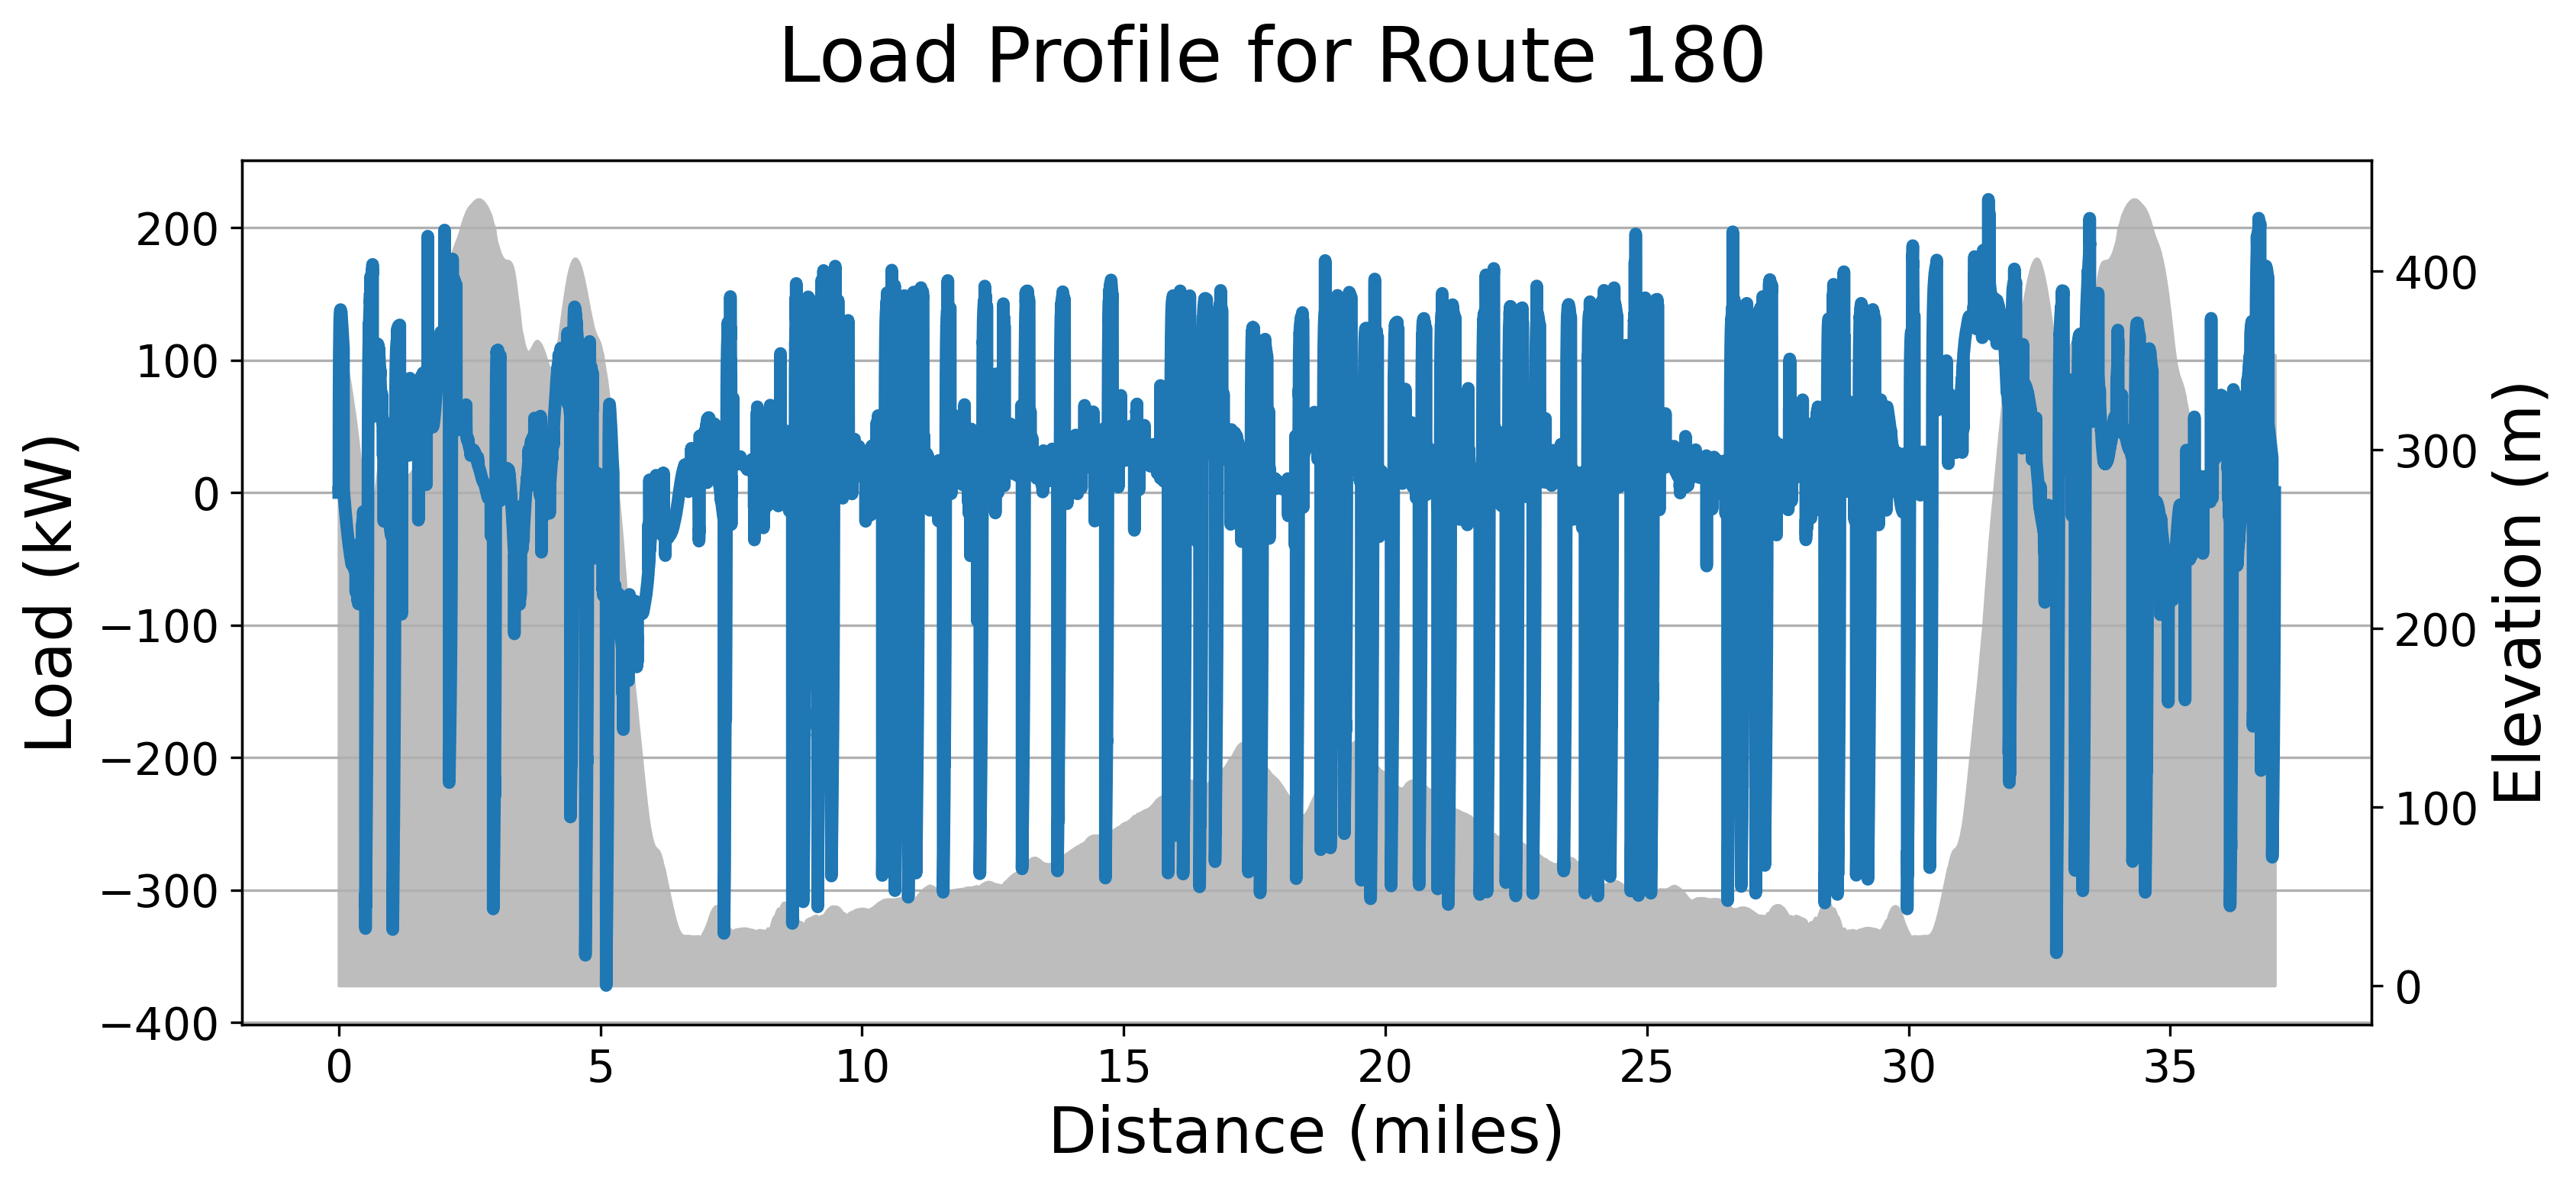

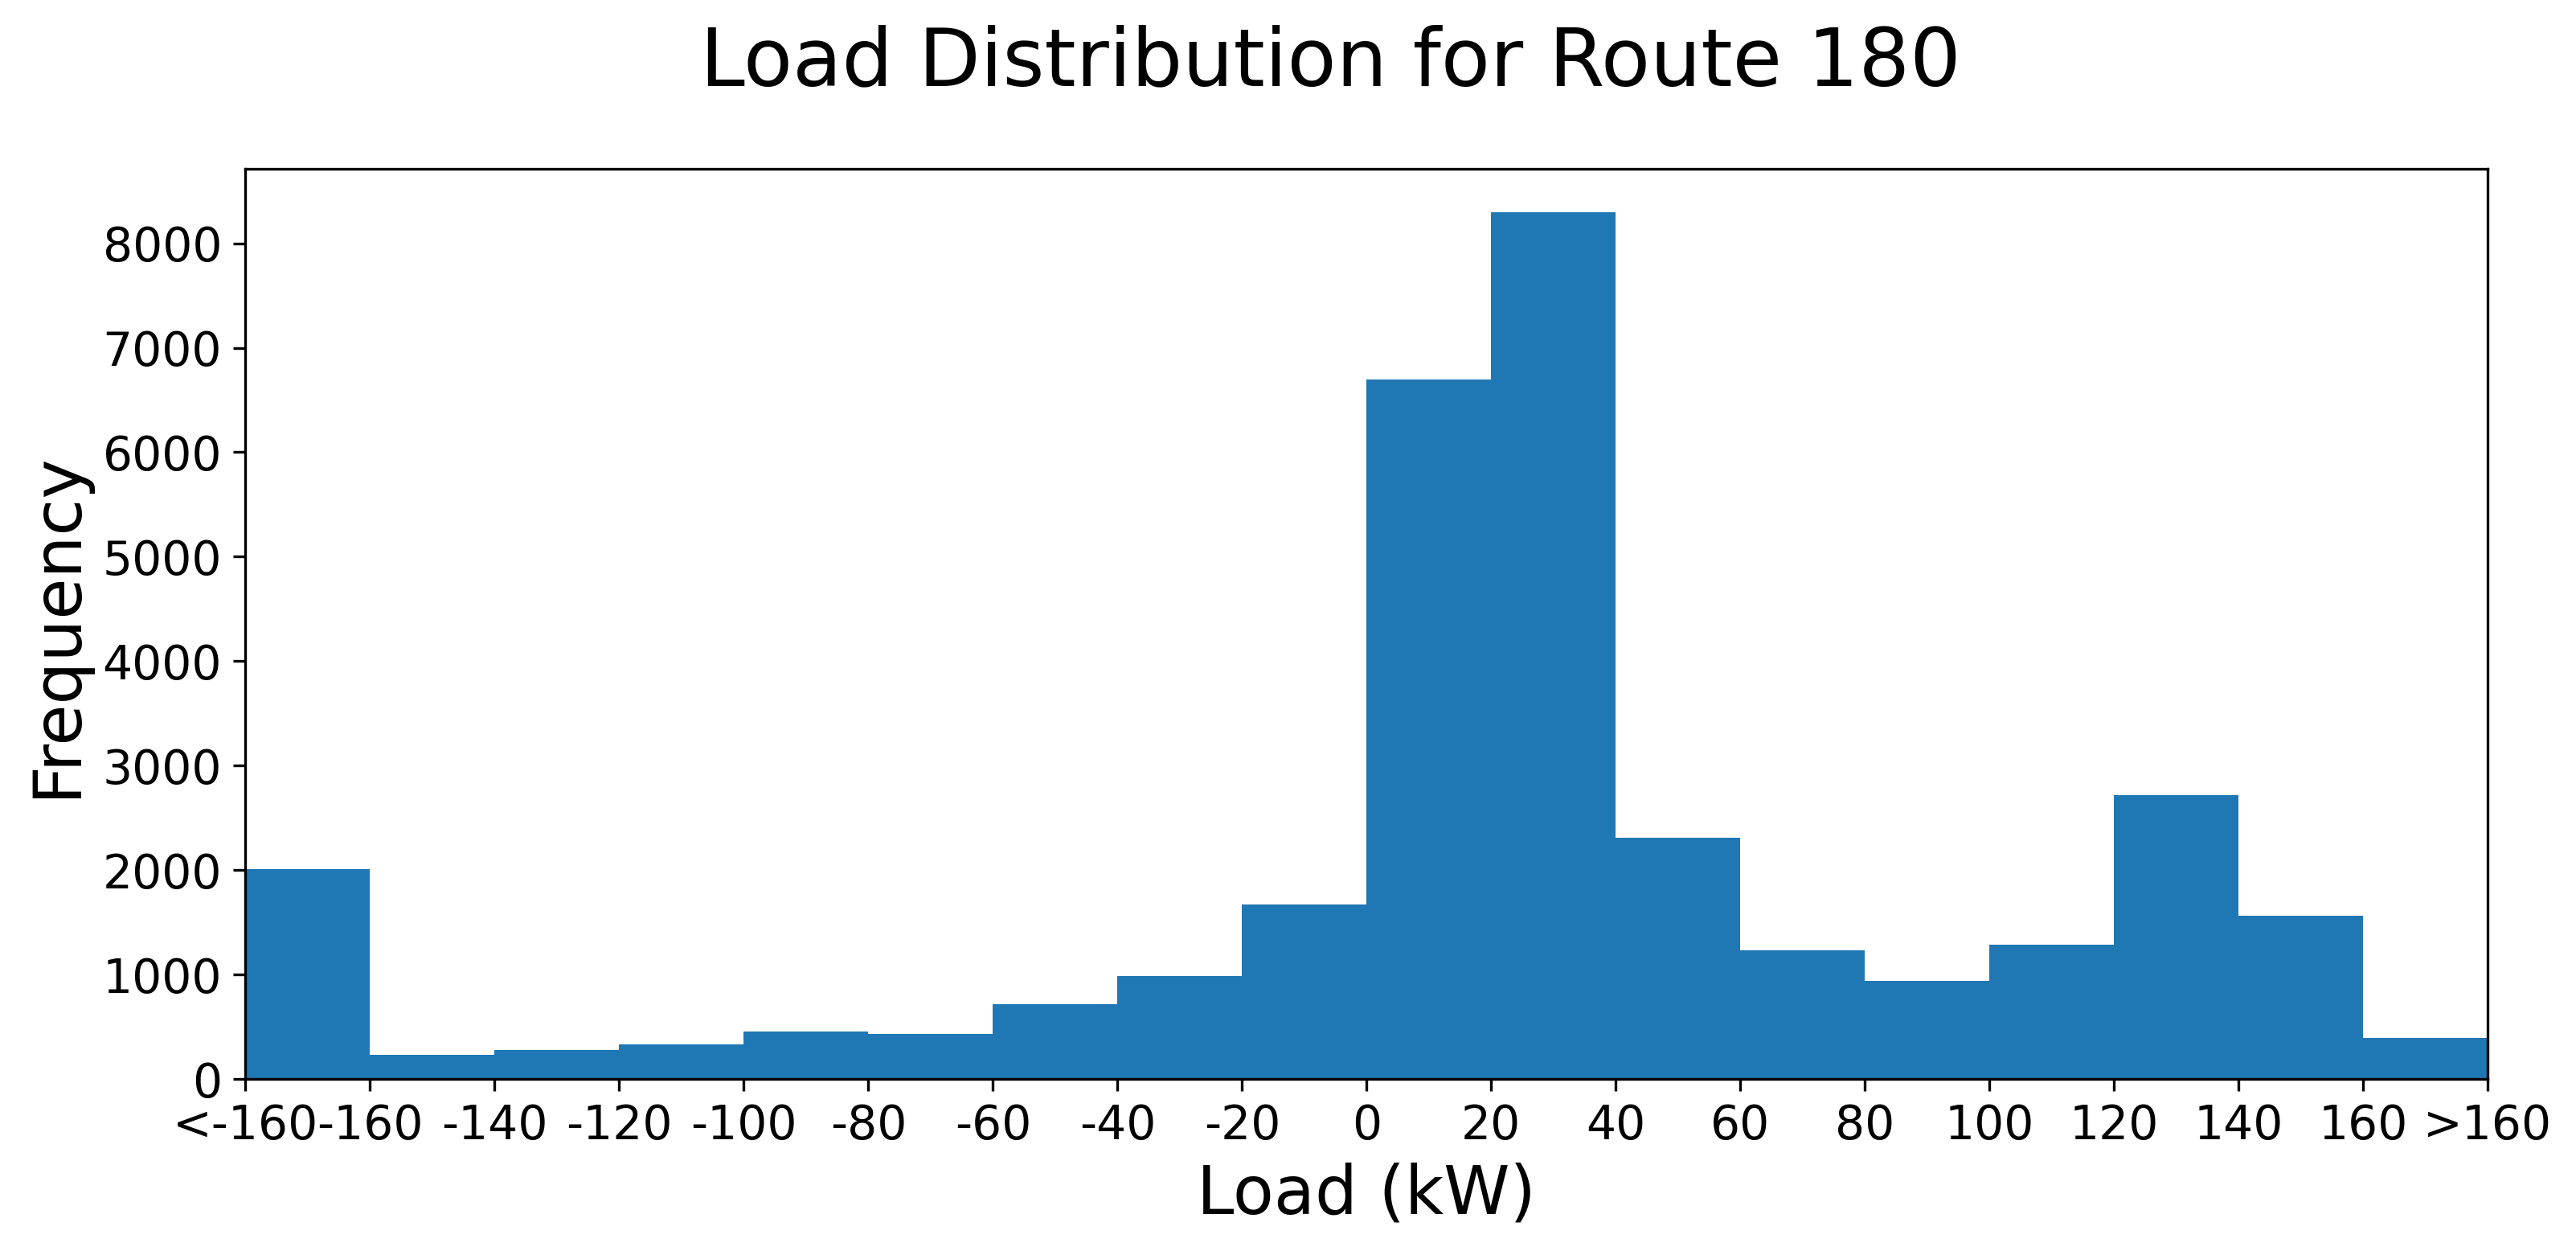

In [6]:
energy_req = []
energy_pm = []
max_load = []
min_load = []

for i in rt_list:
    
    shapefile_name = '../data/rt' + str(i) + '_pts.shp'
    
    rt_df = base.wrapper(shapefile_name)
    
    df, riders, mass = ride.route_ridership('AM', i) 
    stop_coord, rider_coord = ride.stop_coord(i, riders)
    coords = rider_coord['coordinates'].values
    mass2 = rider_coord['Mean'].values
    
    ex = ldm.RouteTrajectory(
    i, 
    shapefile_name, 
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords,
    mass_array=mass2 + mass,
    charging_power_max = 160,
    a_prof = a_prof)
    
    energy = ex.energy_from_route()    
    energy_req.append(energy)
        
    epm = ex.energy_from_route()/(ex.route_df.cum_distance.tail(1))
    energy_pm.append(epm)
    
    max_l = ex.raw_batt_power_exert.max()
    max_load.append(max_l)
    
    min_l = ex.raw_batt_power_exert.min()
    min_load.append(min_l)
    
    elev = vis.x_elev(ex.raw_batt_power_exert, ex.route_df.cum_distance, ex.route_df.elevation, i)
    
    hist = vis.hist(ex.raw_batt_power_exert, ex.route_df.cum_distance, i)

In [8]:
energy

215209495.19283545